# İş Uygulaması: Web Sitesinde Geçirilen Sürenin Testi

- tek örneklem t testi için bir iş uygulamasını python ile gerçekleştireceğiz.

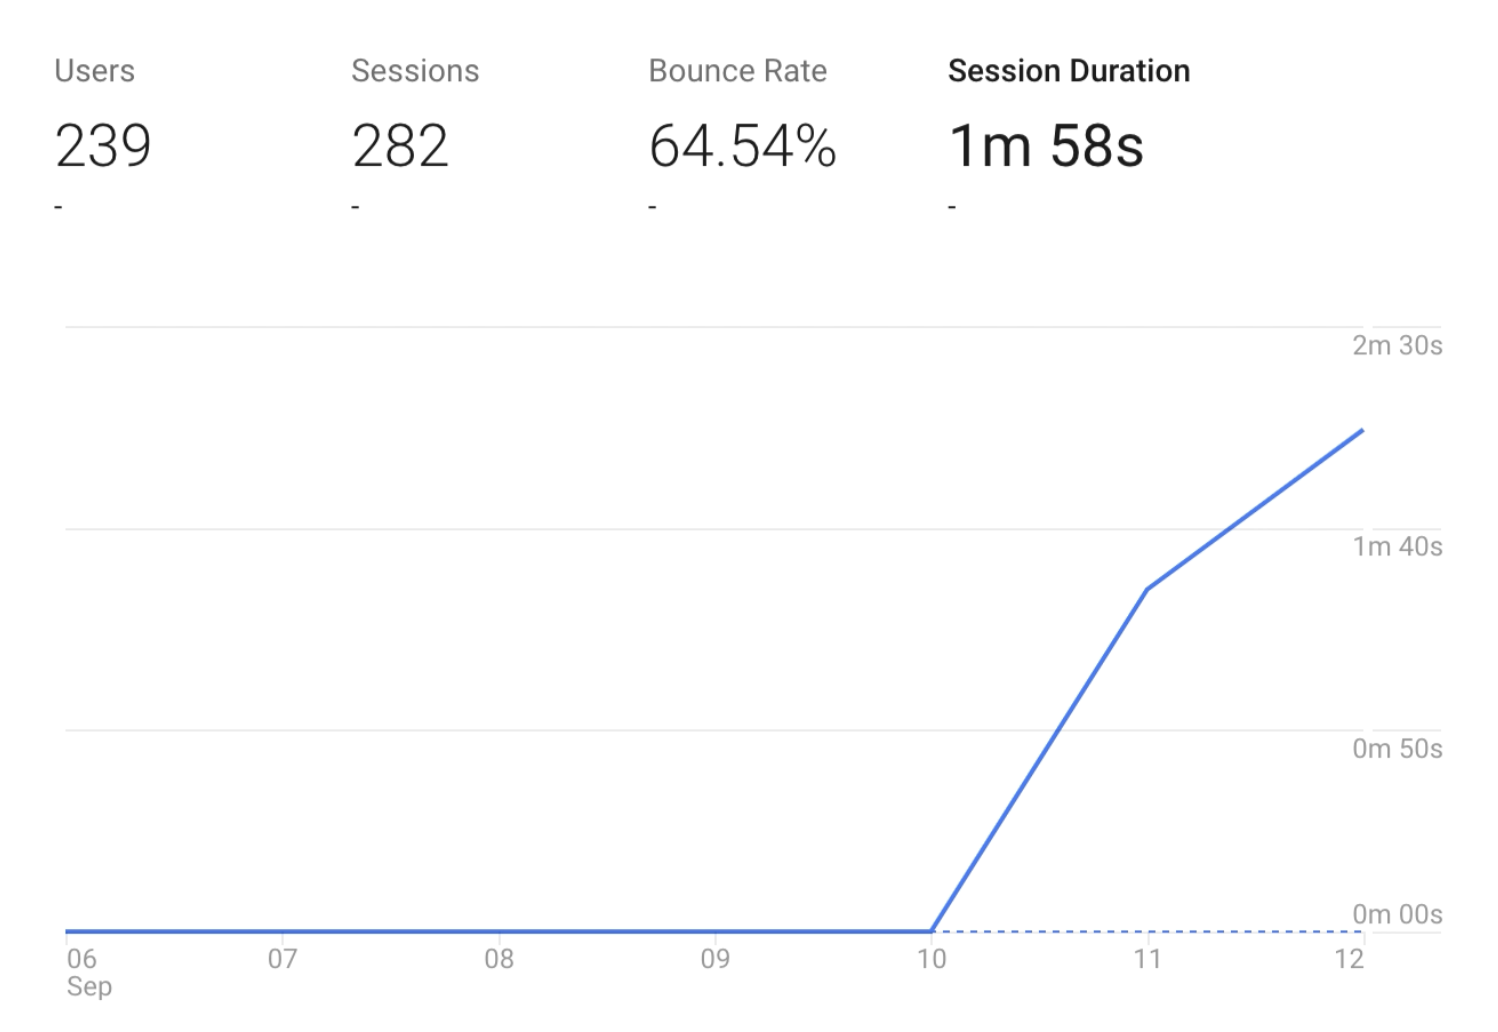

- Session Duration: Oturum süresi demektir. web sitemizde geçirilen ortalama süre demektir. 1 dakika 58 saniye

- **Problem**: 
Web sitemizde geçirilen ortalama süre gerçekten 170 saniye mi?

- **Detaylar**
    - Yazılımlardan elde edilen web sitesinde geçirilen ortalama süreler var.
    - Bu veriler incelendiğinde bir yönetici ya da çalışanımız bu değerlerin böyle olmadığına yönelik düşünceler taşıyor ve bu durumu test etmek istiyorlar.

## Hipotezimizi Kuralım
- H0: μ = 170
- H1: μ ≠ 170

# Tek Örneklem T Testi

Örnek ortalamasına ilişkin test yapmak için kullanılır.

**Hipotezler:**


<table>
<tr>
<td style="width: 100px">
<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>50</i></d><br>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>50</i></d><br><br>
</td>
<td style="width: 100px">
<d><i>H</i><sub>0</sub>: <i>μ</i> <= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> > <i>50</i></d><br><br>
</td>
<td style="width: 100px">
<d><i>H</i><sub>0</sub>: <i>μ</i> >= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> < <i>50</i></d><br><br>
</td>
</tr>

</table>



**Test İstatistiği:**

${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{\frac {s}{\sqrt {n}}}}}$

### Web sitemizde geçirilen ortalama süre gerçekten 170 saniye mi? Bunu test edeceğiz.

In [1]:
import numpy as np

In [2]:
# web sitemizde geçirilen zamanlar:
olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [3]:
olcumler[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

#### Ölçümlerin betimsel istatistiklerini inceleyelim

In [4]:
import scipy.stats as stats

In [5]:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

- gözlem sayısı(n): 50
- min ve max değerler: 17 ve 251
- mean(ortalama): 154.38
- varyans: 2578.0363265306123
- basıklık(kurtosis): -0.05849823498415985
- çarpıklık(skewness): -0.32398897278694483

Örneklemin ortalaması 154 iken, elimizde araştırılmak istenen bilgi olarak 170 sunulmuştur. Ancak 170 değerine hemen "yanlış" demek doğru olmayabilir, çünkü 154 değeri şansa bağlı olarak elde edilmiş olabilir. Bu durumda farklı bir örneklem alırsak, elde ettiğimiz değer değişebilir. Bu şansa bağlı oluşma ihtimalini değerlendirmek amacıyla bir hipotez kurarak test edeceğiz.

Testi hemen yapmaya başlayamayız, varsayımlarımız bulunmaktadır.

## Varsayımlar

### Tek Örneklem T Testi: Varsayım Kontrolü


### Normallik varsayımı
Normallik varsayımı 2 türlü gerçekleştirilebilir:
1. Grafik yöntemlerle
2. Bazı testlerle

- Grafik yöntemlerden histogram ve qqplot teknikleri kullanılabilir.

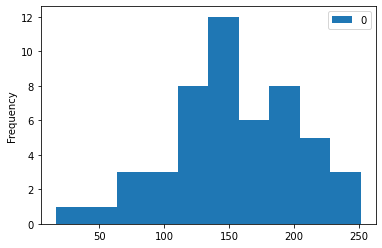

In [6]:
# Histogram
import pandas as pd
pd.DataFrame(olcumler).plot.hist();

Dağılımda bir bozukluk görülmemektedir. Dağılımın normal olduğu izlenimi verilmektedir.

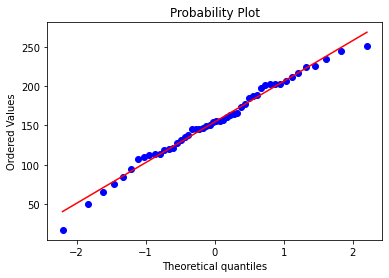

In [7]:
# qqplot
import pylab
stats.probplot(olcumler, dist="norm", plot=pylab)
pylab.show()

Grafik incelendiğinde normal dağılım varsayımının sağlandığı gözlemlenmektedir. Sol taraf, örnek dağılımını; alt taraf ise teorik dağılımı ifade eder. Örnek dağılımı, elimizdeki örneklemin değerleridir (ölçümler). Teorik dağılım ise ilgilendiğimiz normal dağılımdır. Teorik dağılım ile normal dağılım arasında bir değerlendirme imkanı sağlayan QQ plot kullanılarak elimizdeki örneğin normal dağılıp dağılmadığına ilişkin bir bilgi sahibi oluruz. Peki, bu grafik nasıl değerlendirilir? Örnek dağılımıyla teorik normal dağılım arasındaki dağılımın birbirine benzer olması durumunu gözlemlemek adına noktaların ortadaki kırmızı çizginin etrafında konumlanmasını bekleriz, sarılmış veya kümelenmiş olmasını bekleriz. Noktaların kırmızı çizgi etrafında konumlandığı gözlemlenmektedir ve teorik ile örnek dağılımının birbirine benzediği gözlemlenmektedir.

- Test olarak Shapiro-Wilks Testi

Hipotez testinin içerisindeyiz başka bir hipotez testi yapacağız. amacımız elimizdeki sayısal değişkenin ortalamasının yani örneklemimizin ortalamasının belirli bir değere eşit olup olmadığını sınamak. istatistik teorisi bunu bilimsel olarak sınar. bunu yapabilmek için varsayımların sağlanıp sağlanmadığını test etmeli. normallik varsayımı. elimizdeki örneklemin normalliği(ölçümler). örneklemin dağılımı normal mi?

dağılımın normal olup olmadığına bakmak için hipotez testi olan **Shapiro-Wilks Testi**
- H0: örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir farklılık yoktur.
- H1: farklılık vardır.

dağılım uygunluğu testi olduğundan H0'ı reddedmemeyle ilgileniyoruz

In [8]:
# Shapiro-Wilks Testi
from scipy.stats import shapiro
shapiro(olcumler)

ShapiroResult(statistic=0.9853105545043945, pvalue=0.7848747968673706)

In [15]:
print("T Hesap İstatistiği: " + str(shapiro(olcumler)[0]),"(test istatistiği)")
print("Hesaplanan P-value: " + str(shapiro(olcumler)[1]))

T Hesap İstatistiği: 0.9853105545043945 (test istatistiği)
Hesaplanan P-value: 0.7848747968673706



sadece pvalue değerine bakarak değerlendirmelerde bulunabiliriz. pvalue<0.05 olduğunda H0'ı reddediyoruz. pvalue, 0.78 olduğundan H0 hipotezi reddedilemez. H0: örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir farklılık yoktur. öyleyse parametrik bir test olan tek örneklem t testini uygulayabiliriz çünkü normal dağılım varsayımı sağlanmaktadır.

Varsayım sağlanıyorsa testi gerçekleştirebiliriz.

## Tek Örneklem T Testi Uygulaması

In [10]:
# Hipotez Testinin Uygulanması
stats.ttest_1samp(olcumler, popmean=170) # 170 mi?

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

pvalue=0.034<0.05 olduğundan H0 hipotezi reddedilir.

- H0: Web sitemizde geçirilen ortalama süre 170'tir.
- H1: ... değildir.

Web sitemizde geçirilen ortalama süre 170 değildir.

zaten örneklemden elde ettiğimiz değer 154 olduğundan web sitemizde geçirilen süre 170'den küçüktür.

alfa, çalışmanın başında kabul edilen hata miktarı 0.05

# Nonparametrik Tek örneklem T Testi

Önceki bölümde hipotezimizi reddettik ve web sitemizde geçirilen sürenin 170 saniyeden farklı olduğunu istatistiksel olarak ortaya koyduk. Önceki bölümde yaptığımız tek örneklem t testiydi. Bu parametrik bir testtir. Parametrik testler, çeşitli varsayımların sağlandığı durumlarda uygulanabilen testlerdir. Önceki bölümde t örneklem t testine ilişkin olan varsayım ise normallik varsayımıydı ve bu varsayımın sağlandığını gözlemledik. Bundan dolayı parametrik bir test olan tek örneklem t testini uygulayabilmiştik.

Fakat gerçek hayatta bazı durumlarda ilgilendiğimiz hipotez testlerine ilişkin gerekli olan varsayımlar sağlanamayabilir.

Varsayalım ki önceki bölümde yapmış olduğumuz Shapiro-Wilk testinin sonucunda H0 hipotezini reddettik. Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir farklılık **vardır**. Bu durumda tek örneklem t testini kullanamayız.

Kullanılacak olan testlerin mutlaka varsayımlarının sağlanıp sağlanmadığına bakılmalıdır. Güvenilir yorumları yapmamızı sağlayan şey varsayımlardır. Varsayımlar sağlanmazsa, bu durumda o testler ve yorumlar güvenilir olmayacaktır. Bunun için nonparametrik istatistik kullanılır.

In [11]:
# Nonparametrik tek örneklem testi yapcağız
from statsmodels.stats.descriptivestats import sign_test

In [12]:
sign_test(olcumler, 170)

(-7.0, 0.06490864707227217)

- test istatistiği: -7.0
- p-value: 0.06490864707227217

p-value < 0.05 şart sağlanmıyor. H0'ı reddedemiyoruz. ama dağılımımız normaldi, simetrikti. dolayısıyla bu sonuçla ilgilenmiyoruz. bu elimizdeki veri zaten parametrikti. sonucu yanıltıcı çıktı. eğer elimizdeki örneğe ilişkin normallik varsayımı sağlanmasaydı bu durumda nonparametriği kullanmalıyız. bu durumda buradaki p-value değerine göre bir karar almış olacaktık ama zaten varsayım sağlanmıştı. 

medyan değerine ilişkin bir hipotez kurulmaktadır. yine bir test yapılıyor. merkezi eğilime yönelik bir test, merkezi eğilimin(ortalamanın, medyanın...) 170 olup olmadığını test etmiş olduk. dağılım çarpık olduğunda bu durumda ortalamanın kullanılamayacak olduğu gibi parametrik testte kullanılamıyor. Nonparametrik bir hipotez testi kurduğumuzda bu hipotez testinin kavramsal karşılığı yine aynı olsada ufak tefek farklılıklar vardır. 

Güven aralığı ile ilgili bir sorum olacaktı. %95 oranında doğrulukla bu aralığı oluşturduğumuzu varsayıyoruz.

elimizdeki bu popülasyondan 100 farklı örneklem çekecek olursak, bu örneklemlerin 95'inde (%95'inde) ortalama 57-60 arası olacak.

kullanıcıların(populasyon oluyor burada) %95'i bu ürüne 57-60 arasında ücret ödemeyi kabul ederken, %5'i bu bandın dışında öder diyoruz.